In [70]:
import os
from glob import glob
import h5py
import numpy as np
from matplotlib import pyplot as plt
px = 1  /plt.rcParams['figure.dpi']  # pixel in inches

rgb_imgs = sorted(glob("D:/dataset/hypersim/downloads/ai_001_001/ai_001_001/images/scene_cam_00_final_hdf5/*.color.hdf5"))
depth_imgs = sorted(glob("D:/dataset/hypersim/downloads/ai_001_001/ai_001_001/images/scene_cam_00_geometry_hdf5/*.depth_meters.hdf5"))
print(len(rgb_imgs), len(depth_imgs))

with h5py.File(rgb_imgs[0]) as f:
    img = np.array(f['dataset'], dtype=np.float32)
    print(img.shape)

with h5py.File(depth_imgs[0]) as f:
    depth = np.array(f['dataset'], dtype=np.float32)
    print(depth.shape)

98 98
(768, 1024, 3)
(768, 1024)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


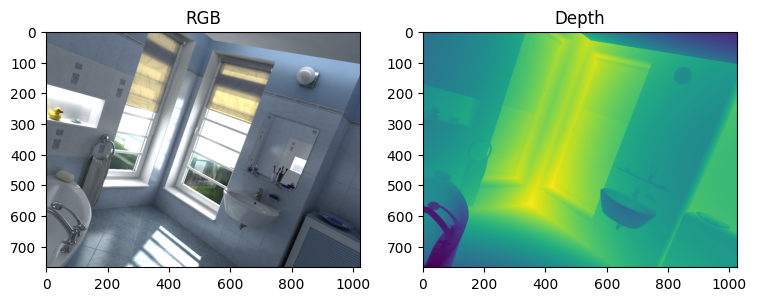

In [72]:
fig, ax = plt.subplots(figsize=(768 * px, 1024 * px), ncols=2)

data = [img, depth]
titles = ['RGB', 'Depth']
for i in range(2):
    ax[i].imshow(data[i])
    ax[i].set_title(titles[i])

plt.tight_layout()
plt.show()

In [75]:
# Normalize Depth Image
depth = (depth - depth.min()) / (depth.max() - depth.min())